## Loading Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

path = '/content/drive/MyDrive/commonwealth_bank_analysis/supermarket_transactions.xlsx'
df = pd.read_excel(path, index_col=0)

# Display the first 5 rows of the DataFrame
print(df.iloc[:5,])

                                     id           timestamp  quantity  \
0  47d54138-a950-4ec0-9d4a-e637e8dfb290 2022-04-28 09:11:00        10   
1  dea298b1-26ca-4a43-bcef-4050fb74ce1d 2019-12-06 16:21:00         1   
2  8dcd78f6-2e68-4fe3-9bb0-afe3bb2c3944 2019-06-22 15:27:00        10   
3  261c100c-b121-44b7-bc03-787f396c2061 2020-08-16 18:14:00         8   
4  7d025b4d-caac-40a5-b954-63cd7bd20f92 2019-11-12 15:46:00         1   

                             product_id product_name  unit_price  \
0  56b274d1-b2a4-47be-abaf-6c1c7742beb9        wheat        0.39   
1  56b274d1-b2a4-47be-abaf-6c1c7742beb9        wheat        0.39   
2  56b274d1-b2a4-47be-abaf-6c1c7742beb9        wheat        0.39   
3  56b274d1-b2a4-47be-abaf-6c1c7742beb9        wheat        0.39   
4  56b274d1-b2a4-47be-abaf-6c1c7742beb9        wheat        0.39   

   total_amount              store payment_method  \
0          3.90    South Billyview           cash   
1          0.39       South Edward    contactl

# Question on Forage

## Question 1: Across locations, how many apples were purchased in cash?

In [3]:
apples_cash = df[(df['product_name'] == 'apple') & (df['payment_method'] == 'cash')]

num_apples_cash = apples_cash['quantity'].sum()

print(num_apples_cash)

117


## Queestion 2: How much total cash was spent on these apples?

In [4]:
total_cash_spent_on_apples = (apples_cash['quantity'] * apples_cash['unit_price']).sum()

print(total_cash_spent_on_apples)

537.03


## Question 3: Across all payment methods, how much money was spent at the Bakershire store location by non-member customers?

In [5]:
bakershire_nonmember = df[(df['store'] == 'Bakershire') & (df['customer_type'] == 'non-member')]

bakershire_nonmember_total_money = bakershire_nonmember['total_amount'].sum()
print(bakershire_nonmember_total_money)

2857.5099999999993


# Data Visualisation

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

## Number of items purchased by product name

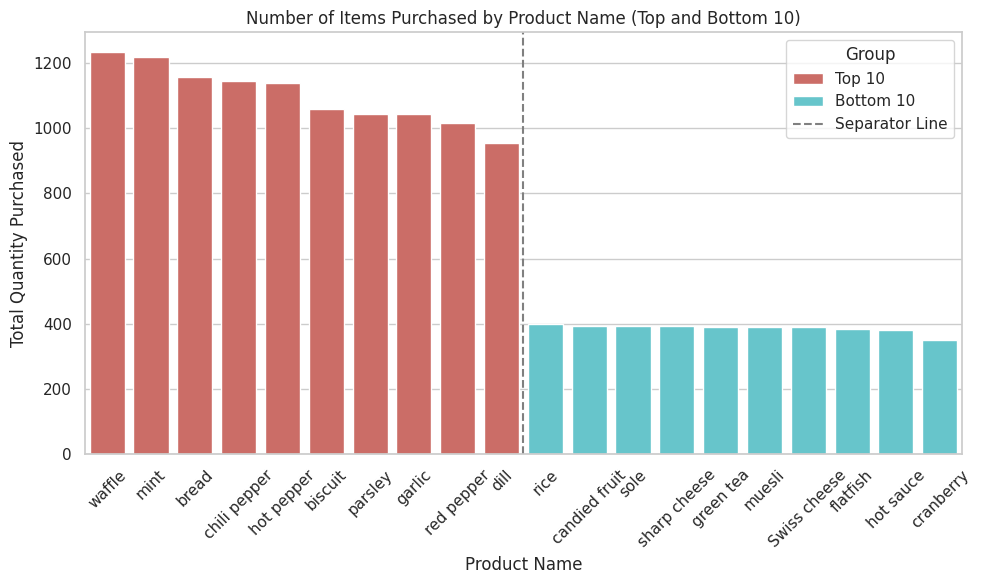

In [7]:
product_quantity = df.groupby('product_name')['quantity'].sum().reset_index()

# Get the top 10 and bottom 10 products by quantity
top_products = product_quantity.sort_values(by='quantity', ascending=False).head(10)
bottom_products = product_quantity.sort_values(by='quantity').head(10)
combined_products = pd.concat([top_products, bottom_products]).sort_values(by='quantity', ascending=False)
combined_products['group'] = ['Top 10'] * len(top_products) + ['Bottom 10'] * len(bottom_products)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y='quantity', data=combined_products, hue='group', palette="hls")
plt.axvline(x=len(top_products) - 0.5, color='gray', linestyle='--', label='Separator Line')
plt.title('Number of Items Purchased by Product Name (Top and Bottom 10)')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.tight_layout()
plt.show()

## Total amount spent by store

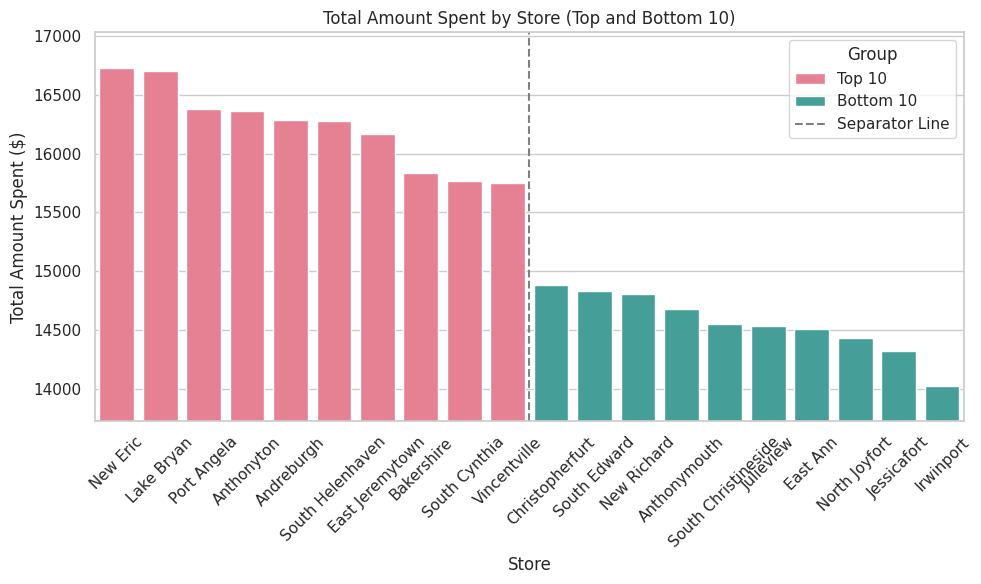

In [8]:
store_revenue = df.groupby('store')['total_amount'].sum().reset_index()

# Get the top 10 and bottom 10 stores by rev
top_stores = store_revenue.sort_values(by='total_amount', ascending=False).head(10)
bottom_stores = store_revenue.sort_values(by='total_amount').head(10)
combined_stores = pd.concat([top_stores, bottom_stores]).sort_values(by='total_amount', ascending=False)
combined_stores['group'] = ['Top 10'] * len(top_stores) + ['Bottom 10'] * len(bottom_stores)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='store', y='total_amount', data=combined_stores, hue='group', palette='husl')
plt.axvline(x=len(top_products) - 0.5, color='gray', linestyle='--', label='Separator Line')

# Set y-axis limits to start from the minimum total amount
max_amount = combined_stores['total_amount'].max()
min_amount = combined_stores['total_amount'].min()
plt.ylim(top=(max_amount+300), bottom=(min_amount-300))

plt.title('Total Amount Spent by Store (Top and Bottom 10)')
plt.xlabel('Store')
plt.ylabel('Total Amount Spent ($)')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.tight_layout()
plt.show()

### Distribution of payment methods

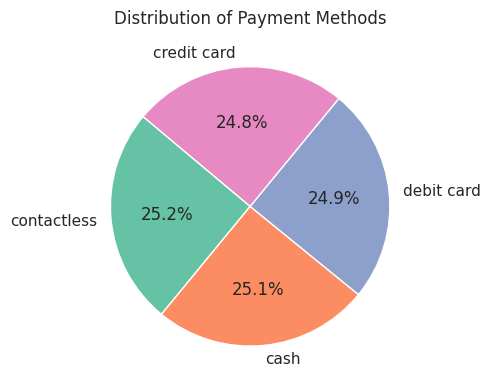

In [9]:
# Get the counts of each payment method
payment_methods = df['payment_method'].value_counts().reset_index()

# Plot
plt.figure(figsize=(5, 5))
plt.pie(payment_methods['count'], labels=payment_methods['payment_method'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(payment_methods)+3))
plt.title('Distribution of Payment Methods')
plt.tight_layout()
plt.show()

## Spending by customer type

<ipython-input-10-1b8e7adb3321>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_type', y='total_amount', data=customer_spending, palette='Spectral')


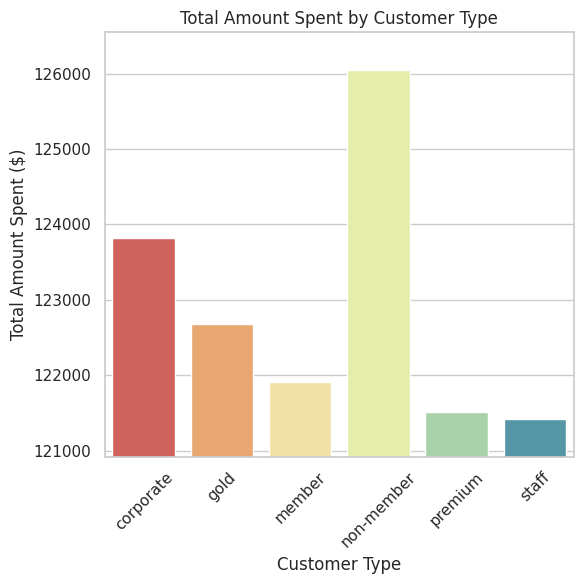

In [10]:
customer_spending = df.groupby('customer_type')['total_amount'].sum().reset_index()

plt.figure(figsize=(6, 6))
sns.barplot(x='customer_type', y='total_amount', data=customer_spending, palette='Spectral')
# Set y-axis limits to start from the minimum total amount
max_spending = customer_spending['total_amount'].max()
min_spending = customer_spending['total_amount'].min()
plt.ylim(top=(max_spending+500), bottom=(min_spending-500))


plt.title('Total Amount Spent by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Amount Spent ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()